<a href="https://colab.research.google.com/github/Srivardini11/lark/blob/main/kplr011083613.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install**

In [1]:
!pip install lightkurve --quiet

     |████████████████████████████████| 247 kB 22.0 MB/s 
     |████████████████████████████████| 98 kB 7.7 MB/s 
     |████████████████████████████████| 4.5 MB 52.4 MB/s 
     |████████████████████████████████| 41 kB 178 kB/s 
     |████████████████████████████████| 832 kB 40.2 MB/s 
     |████████████████████████████████| 54 kB 1.9 MB/s 
     |████████████████████████████████| 3.6 MB 23.7 MB/s 


# **Import**

In [3]:
import matplotlib.pyplot as plt
import matplotlib 
import lightkurve as lk
import numpy as np
from astropy.convolution import convolve, Box1DKernel

matplotlib.rcParams['figure.figsize'] = (15,8)

# The Source

In [4]:
source = lk.search_lightcurve("kplr011083613", author="Kepler", cadence="long",quarter = 9).download()
source

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
object,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
808.5160188023656,nan,nan,0,-9.396176e-04,1038.08325,827.01611,34237,2.6816694e+05,1.3037672e+01,8.1242029e+02,2.5122285e-01,nan,nan,0,nan,nan,nan,nan,1038.08325,2.8515014e-05,827.01611,3.3883443e-05,2.4728522e-02,-4.9585681e-02
808.5364528276332,3.3077988e+05,1.6177628e+01,0,-9.391924e-04,1038.08317,827.01635,34238,2.6819778e+05,1.3038406e+01,8.1323199e+02,2.5187665e-01,3.3077988e+05,1.6177628e+01,0,nan,nan,nan,nan,1038.08317,2.8511633e-05,827.01635,3.3881533e-05,2.4612043e-02,-4.9358301e-02
808.5568868531336,3.3064325e+05,1.6174744e+01,0,-9.387669e-04,1038.08289,827.01669,34239,2.6807416e+05,1.3035479e+01,8.1231628e+02,2.5193137e-01,3.3064325e+05,1.6174744e+01,0,nan,nan,nan,nan,1038.08289,2.8519507e-05,827.01669,3.3887016e-05,2.4405157e-02,-4.9219925e-02
808.5773208788014,3.3045662e+05,1.6173243e+01,0,-9.383412e-04,1038.08282,827.01681,34240,2.6792456e+05,1.3031976e+01,8.1257892e+02,2.5153372e-01,3.3045662e+05,1.6173243e+01,0,nan,nan,nan,nan,1038.08282,2.8533343e-05,827.01681,3.3896969e-05,2.4364593e-02,-4.9175948e-02
808.5977549046511,3.3037519e+05,1.6172733e+01,0,-9.379153e-04,1038.08268,827.01717,34241,2.6786644e+05,1.3030606e+01,8.1276288e+02,2.5122666e-01,3.3037519e+05,1.6172733e+01,0,nan,nan,nan,nan,1038.08268,2.8530709e-05,827.01717,3.3900880e-05,2.4374533e-02,-4.8948083e-02
808.6181890307344,3.3043084e+05,1.6180201e+01,0,-9.374893e-04,1038.08242,827.01733,34242,2.6791709e+05,1.3032749e+01,8.1262000e+02,2.5138956e-01,3.3043084e+05,1.6180201e+01,0,nan,nan,nan,nan,1038.08242,2.8526551e-05,827.01733,3.3900531e-05,2.4223473e-02,-4.8789535e-02
808.6386230570424,3.3046562e+05,1.6181131e+01,0,-9.370630e-04,1038.08245,827.01745,34243,2.6795622e+05,1.3034632e+01,8.1296143e+02,2.5145978e-01,3.3046562e+05,1.6181131e+01,0,nan,nan,nan,nan,1038.08245,2.8525705e-05,827.01745,3.3899309e-05,2.4225641e-02,-4.8637327e-02
808.6590569835316,3.3055012e+05,1.6180553e+01,0,-9.366365e-04,1038.08239,827.01746,34244,2.6803006e+05,1.3036277e+01,8.1126031e+02,2.5163180e-01,3.3055012e+05,1.6180553e+01,0,nan,nan,nan,nan,1038.08239,2.8517554e-05,827.01746,3.3895019e-05,2.4232071e-02,-4.8611429e-02


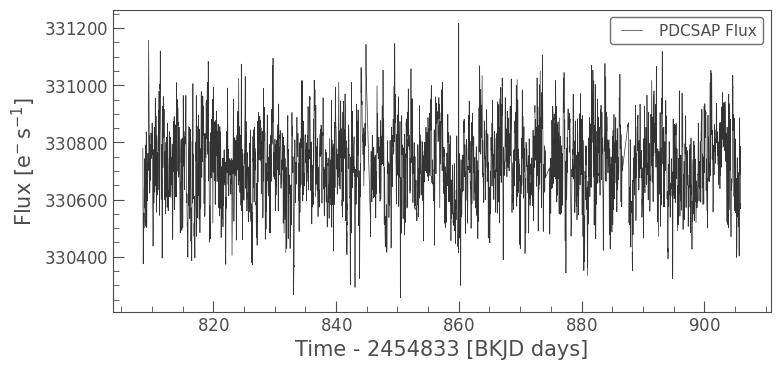

In [5]:
source.plot(label='PDCSAP Flux', normalize=False)

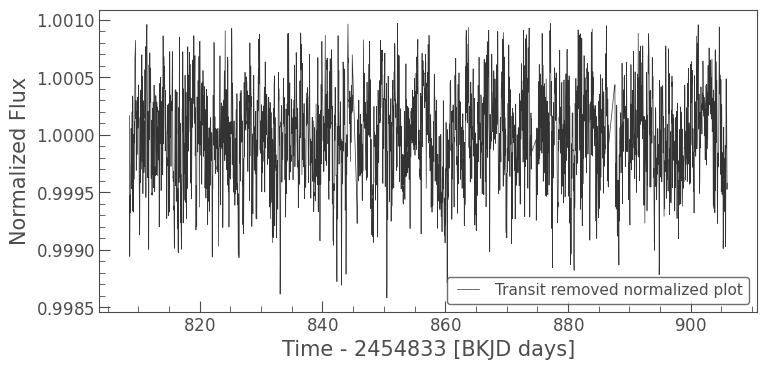

In [6]:
rem_out=source.remove_outliers(sigma_upper = 2.5).normalize()
rem_out.plot(label='Transit removed normalized plot', normalize = True)

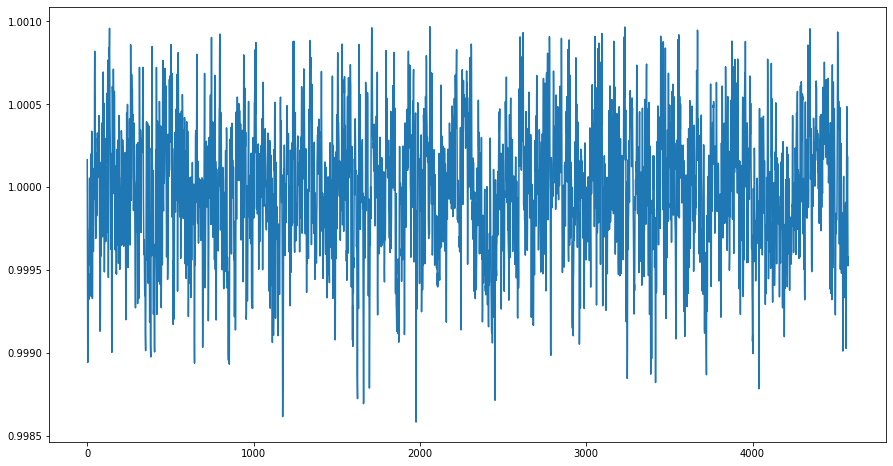

In [7]:
flux = rem_out.flux.value
time = rem_out.time.value
plt.figure(figsize=(15,8))
plt.plot(flux)

In [8]:
smoothed_signal = convolve(flux, Box1DKernel(16))

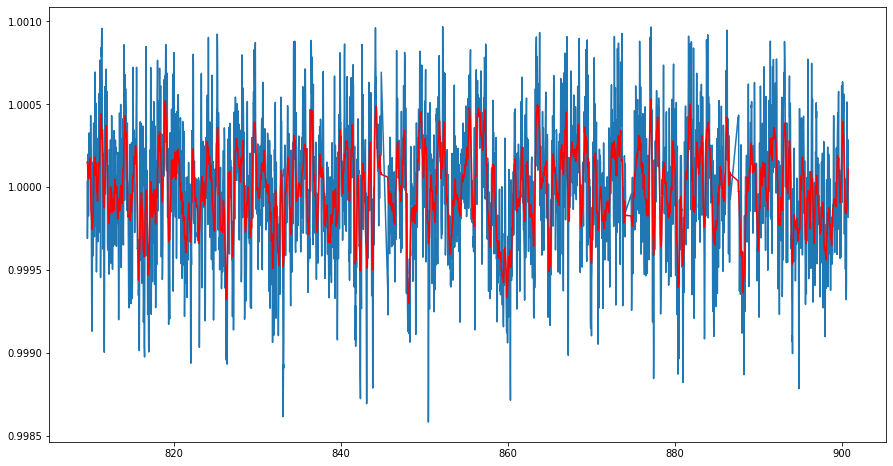

In [9]:
index = 50
ind = 250
plt.plot(time[index:-ind],flux[index:-ind])
plt.plot(time[index:-ind], smoothed_signal[index:-ind],color='red')

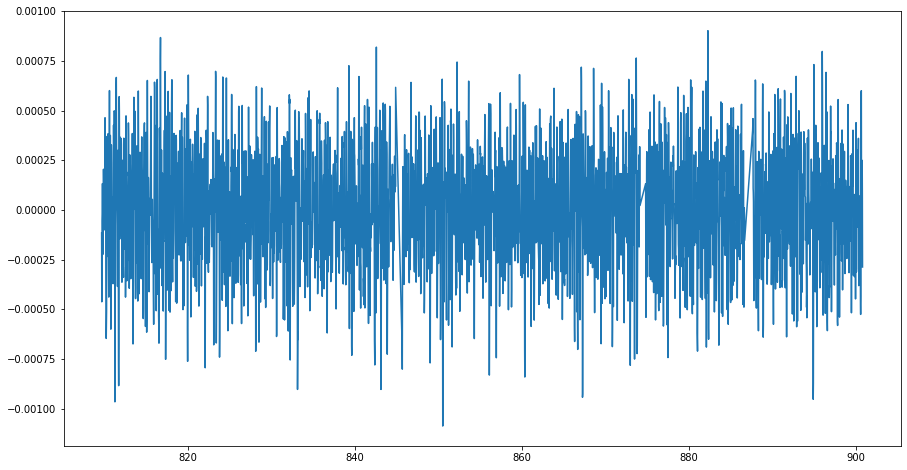

In [10]:
flkr=flux[index:-ind]-smoothed_signal[index:-ind]
plt.figure(figsize=(15,8))
plt.plot(time[index:-ind],flkr)

In [11]:
np.sqrt(np.mean(flkr**2))/1e-3

0.2822734822984785